In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [2]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False


In [12]:
file_path = "./data/직종별_임금_및_근로시간.xlsx"
data_pay = pd.read_excel(file_path)
data_pay

,연도,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,관리자(1),165.6,167.0,179.6,175.3,174.4,161.7,159.2,176.9,178.1
1,전문가 및 관련 종사자(2),159.1,158.3,170.3,167.9,167.3,154.7,152.8,170.3,169.4
2,사무 종사자(3),164.8,165.4,178.6,174.7,172.9,159.5,156.8,173.4,173.5
3,서비스 종사자(4),157.7,148.2,152.2,148.0,142.4,136.2,132.5,132.6,133.1
4,판매 종사자(5),163.4,163.2,170.4,166.1,161.9,151.1,147.3,154.8,152.5
5,농림어업 숙련 종사자(6),155.0,165.3,166.4,162.2,150.8,145.0,137.2,153.8,145.5
6,기능원 및 관련 기능 종사자(7),168.8,165.6,171.8,164.7,163.2,152.5,146.5,151.3,151.1
7,"장치,기계조작 및 조립종사자(8)",194.1,192.3,194.4,196.1,193.9,180.8,173.7,183.5,187.5
8,단순노무 종사자(9),164.3,159.0,160.7,163.0,158.8,144.9,139.3,144.6,147.6


In [4]:
pay_df = data_pay.T.reset_index()
pay_df.columns = ['연도','전직종','서비스','판매','단순노무']
pay_df = pay_df[1:].reset_index(drop=True)

In [5]:
pay_df

,연도,전직종,서비스,판매,단순노무
0,2013,16067,9482,12831,9117
1,2014,16701,9212,13242,9471
2,2015,15978,8792,12678,9358
3,2016,16709,9196,13538,10212
4,2017,17381,9802,13734,11166
5,2018,19522,11043,15651,12603
6,2019,20573,12011,16813,13259
7,2020,19316,11837,16131,13131
8,2021,19806,12295,16398,13074


In [6]:
pay_per_df = pd.DataFrame(columns=['전직종증가율','서비스증가율','판매증가율','단순노무증가율'])
pay_per_df

,전직종증가율,서비스증가율,판매증가율,단순노무증가율


In [7]:
all_list = []
ser_list = []
sale_list = []
sim_list = []

for i in range(len(pay_df)-1):
    all_list.append(round((pay_df['전직종'][i+1] - pay_df['전직종'][i]) / pay_df['전직종'][i],2))
    ser_list.append(round((pay_df['서비스'][i+1] - pay_df['서비스'][i]) / pay_df['서비스'][i],2))
    sale_list.append(round((pay_df['판매'][i+1] - pay_df['판매'][i]) / pay_df['판매'][i],2))
    sim_list.append(round((pay_df['단순노무'][i+1] - pay_df['단순노무'][i]) / pay_df['단순노무'][i],2))
    
pay_per_df['전직종증가율'] = all_list
pay_per_df['서비스증가율'] = ser_list
pay_per_df['판매증가율'] = sale_list
pay_per_df['단순노무증가율'] = sim_list
    # pay_per_df['서비스증가율'] = pay_df['서비스'][i+1] - pay_df['서비스'][i] / pay_df['서비스'][i]
    # pay_per_df['판매증가율'] = pay_df['판매'][i+1] - pay_df['판매'][i] / pay_df['판매'][i]
    # pay_per_df['단순노무증가율'] = pay_df['단순노무'][i+1] - pay_df['단순노무'][i] / pay_df['단순노무'][i]
pay_per_df

,전직종증가율,서비스증가율,판매증가율,단순노무증가율
0,0.04,-0.03,0.03,0.04
1,-0.04,-0.05,-0.04,-0.01
2,0.05,0.05,0.07,0.09
3,0.04,0.07,0.01,0.09
4,0.12,0.13,0.14,0.13
5,0.05,0.09,0.07,0.05
6,-0.06,-0.01,-0.04,-0.01
7,0.03,0.04,0.02,-0.00


In [8]:
pay_df = pay_df.iloc[1:,:]
pay_df = pay_df.reset_index(drop=True)

In [9]:
pay_per = pd.concat([pay_df,pay_per_df],axis=True)
pay_per

,연도,전직종,서비스,판매,단순노무,전직종증가율,서비스증가율,판매증가율,단순노무증가율
0,2014,16701,9212,13242,9471,0.04,-0.03,0.03,0.04
1,2015,15978,8792,12678,9358,-0.04,-0.05,-0.04,-0.01
2,2016,16709,9196,13538,10212,0.05,0.05,0.07,0.09
3,2017,17381,9802,13734,11166,0.04,0.07,0.01,0.09
4,2018,19522,11043,15651,12603,0.12,0.13,0.14,0.13
5,2019,20573,12011,16813,13259,0.05,0.09,0.07,0.05
6,2020,19316,11837,16131,13131,-0.06,-0.01,-0.04,-0.01
7,2021,19806,12295,16398,13074,0.03,0.04,0.02,-0.00


In [10]:
pay_per = pay_per[["연도","전직종증가율","서비스증가율","판매증가율","단순노무증가율"]]
pay_per = pay_per.set_index("연도")
pay_per

c:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,전직종증가율,서비스증가율,판매증가율,단순노무증가율
연도,,,,
2014,0.04,-0.03,0.03,0.04
2015,-0.04,-0.05,-0.04,-0.01
2016,0.05,0.05,0.07,0.09
2017,0.04,0.07,0.01,0.09
2018,0.12,0.13,0.14,0.13
2019,0.05,0.09,0.07,0.05
2020,-0.06,-0.01,-0.04,-0.01
2021,0.03,0.04,0.02,-0.00


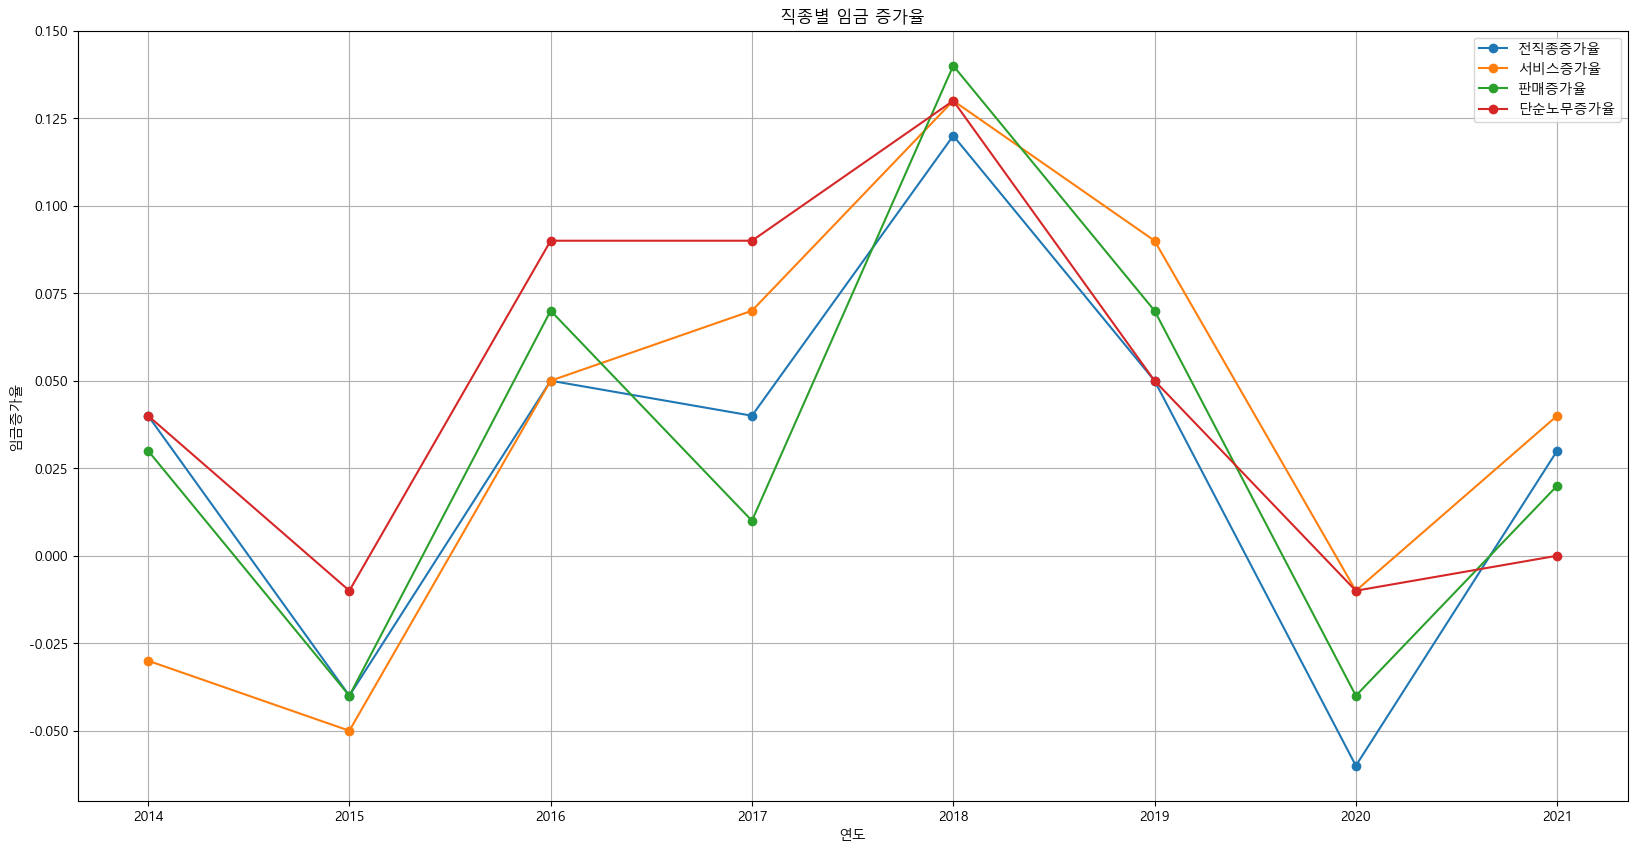

In [11]:
pay_per.plot(title = 'SomeTitle', figsize=(20,10), legend = True, marker = 'o', rot=0)

plt.grid(True)
plt.xlabel('연도')
plt.ylabel('임금증가율')
plt.title('직종별 임금 증가율')

plt.show()

# 최저임금이 16.4%로 최대치로 올랐던 18년도에 증가율이 전체적으로 오름

In [12]:

from turtle import width


def MakeBar(data_time_1, rotation, title, ylim = -0.07, stacked=False, yticks_interval = 0.1):
    plt.figure()
    data_time_1.plot(kind='bar',rot = rotation, title = title, legend =True, 
                    stacked = stacked, figsize = (20,10), width =0.7)
    plt.xticks(fontsize = 15)
    plt.legend(loc='best')
    plt.rc('font', family = 'Malgun Gothic', size = 18)
    plt.title("연도별 임금",fontsize = 20,loc='center', pad=30, fontweight="bold")

    print('data_time_1')
    print(data_time_1)
    
    if stacked == False :
        maxlim = (int(max(data_time_1.max())/ yticks_interval)+1) * yticks_interval
        print('maxlim : ',maxlim)
        values = np.arange(130, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values], fontsize = 15) 
    else :
        maxlim = (int(max(data_time_1.sum(axis=1))/ yticks_interval)+1) * yticks_interval
        print('maxlim : ',maxlim)
        values = np.arange(130, maxlim+1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values], fontsize = 15) 
    if ylim != None :
        plt.ylim(ylim)

data_time_1
      전직종증가율  서비스증가율  판매증가율  단순노무증가율
연도                                  
2014    0.04   -0.03   0.03     0.04
2015   -0.04   -0.05  -0.04    -0.01
2016    0.05    0.05   0.07     0.09
2017    0.04    0.07   0.01     0.09
2018    0.12    0.13   0.14     0.13
2019    0.05    0.09   0.07     0.05
2020   -0.06   -0.01  -0.04    -0.01
2021    0.03    0.04   0.02    -0.00
maxlim :  0.2


<Figure size 640x480 with 0 Axes>

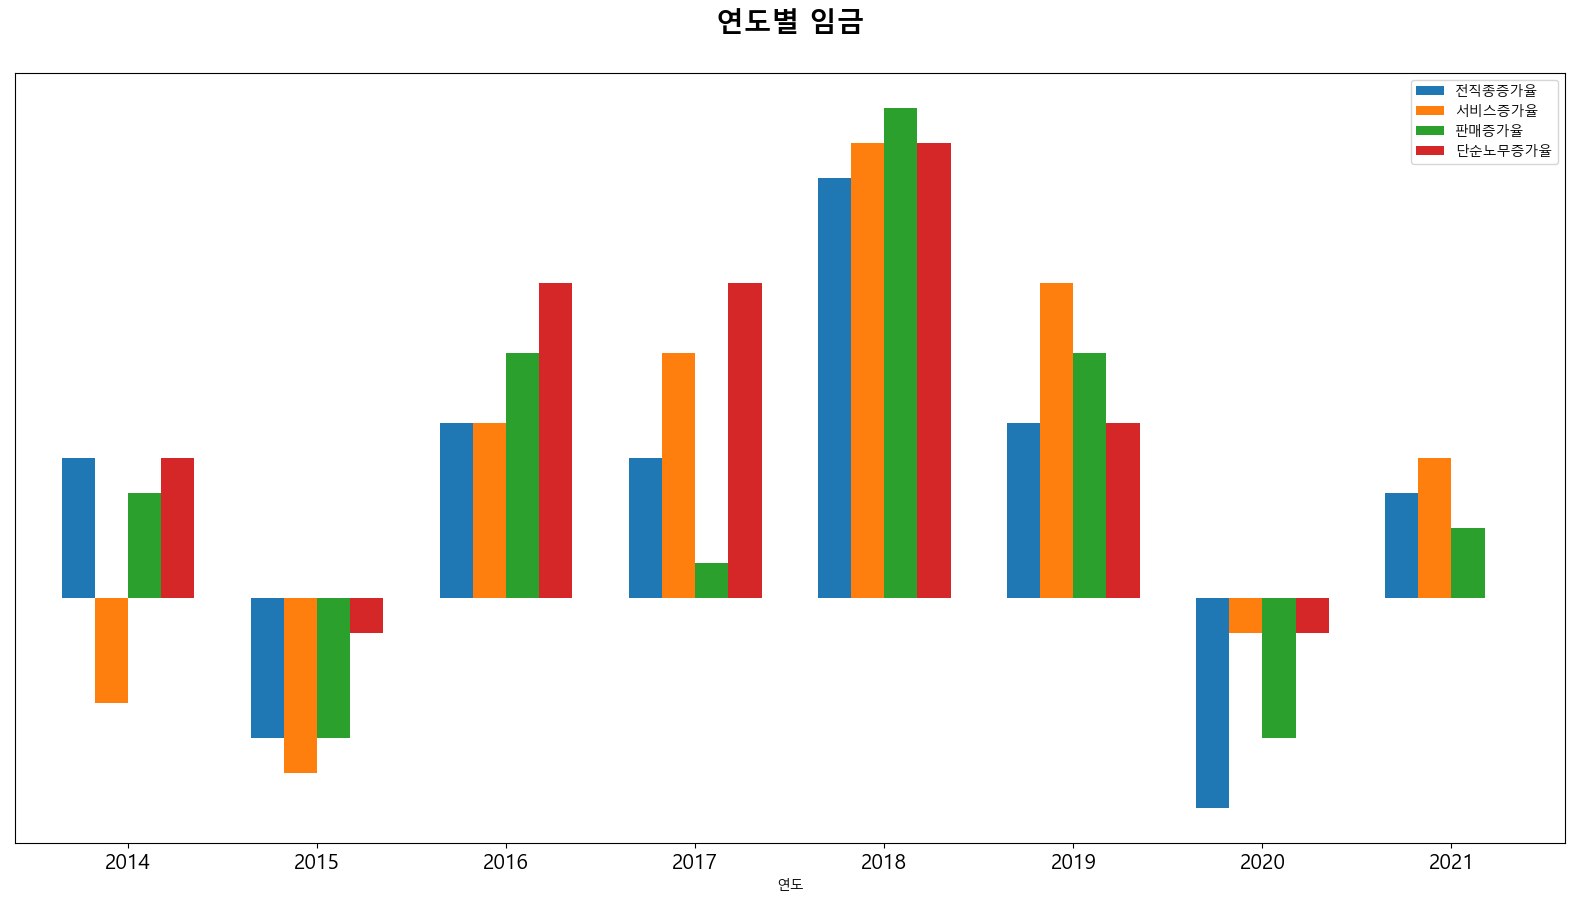

In [13]:
MakeBar(data_time_1 = pay_per, rotation = 0, title = "연도별 임금")



plt.show()